In [71]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from qutip import *

# States and Operator

#### Qubit (two-level system) operators

In [5]:
g = basis(2,0)    #ground state
e = basis(2,1)    #excited state

In [6]:
g

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [7]:
e

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

###### The dimension, or composite Hilbert state space structure

In [8]:
g.dims 

[[2], [1]]

##### The shape of the matrix data representation

In [9]:
g.shape

(2, 1)

#### Pauli Matrix

In [10]:
# Pauli sigma x
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [11]:
# Pauli sigma y
sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [12]:
# Pauli sigma z
sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

#### Harmonic oscillator operators

In [13]:
#  annihilation operator
destroy(N=8) # N = number of fock states included in the Hilbert space

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [14]:
# creation operator
create(N=8) # equivalent to destroy(8).dag()

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

In [15]:
# the position operator is easily constructed from the annihilation operator
a = destroy(8)
x = a + a.dag()

x

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [1.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         1.73205081 0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         2.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.        ]]

### Using Qobj instances we can check some well known commutation relations:

#### E.g. $[a, a\dagger] = 1$

In [16]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

In [17]:
a = destroy(5)
commutator(a, a.dag())

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]

#### E.g. $[x,p] = i$

In [20]:
x =       (a + a.dag())/np.sqrt(2)
p = -1j * (a - a.dag())/np.sqrt(2)

commutator(x, p)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-4.j]]

#### E.g. Pauli spin inequalities $[\sigma_x, \sigma_y] = 2i \sigma_z$

In [22]:
commutator(sigmax(), sigmay()) - 2j * sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

#### Check  $\sigma_x^2 = \sigma_y^2 = \sigma_z^2 = \mathbf{1}$

In [24]:
sigmax()**2 == sigmay()**2 == sigmaz()**2 == qeye(2)

True

# Composite systems

### system composed of two qubits
E.g. A Pauli $\sigma_z$ operator that acts on the first qubit and leaves the second qubit unaffected (i.e., the operator $\sigma_z \otimes \mathbf{1}$):

In [28]:
sz1 = tensor(sigmaz(), qeye(2))
sz1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

#### verify that this two-qubit operator does indeed have the desired properties:

In [32]:
N = 2
psi1 = tensor(basis(N,1), basis(N,0)) # excited first qubit
psi2 = tensor(basis(N,0), basis(N,1)) # excited second qubit

sz1 * psi1 == psi1 
# What we expect is False, because sz1 should flip the sign of the excited state of psi1
sz1 * psi2 == psi2
# what we expect is True, because sz1 should leave psi2 unaffected

True

In [33]:
sz2 = tensor(qeye(2), sigmaz()) # same thing for the second qubit we can do:
 
sz2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

#### Now, we can creat a Qobj representation of a coupled two-qubit Hamiltonian: $H = \epsilon_1 \sigma_z^{(1)} + \epsilon_2 \sigma_z^{(2)} + g \sigma_x^{(1)}\sigma_x^{(2)}$

In [34]:
epsilon = [1.0, 1.0]
g = 0.1

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())

H = epsilon[0] * sz1 + epsilon[1] * sz2 + g * tensor(sigmax(), sigmax())

H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -2. ]]

# Unitary dynamics


Unitary evolution of a quantum system in QuTiP can be calculated with the mesolve function.

mesolve is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solve it falls back on the unitary evolution of the Schrodinger (for initial states in state vector for) or the von Neuman equation (for initial states in density matrix form).

The evolution solvers in QuTiP returns a class of type Odedata, which contains the solution to the problem posed to the evolution solver.

For example, considor a qubit with Hamiltonian $H = \sigma_x$ and initial state $\left|1\right>$ (in the sigma-z basis): Its evolution can be calculated as follows:

In [54]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

In [55]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [56]:
len(result.states)

100

In [57]:
result.states[-1] # the finial state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.8390774+0.        j]
 [ 0.       +0.54401206j]]

#### Expectation values

The expectation values of an operator given a state vector or density matrix (or list thereof) can be calculated using the expect function.

In [58]:
expect(sigmaz(), result.states[-1])

0.4081017618645427

In [59]:
expect(sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

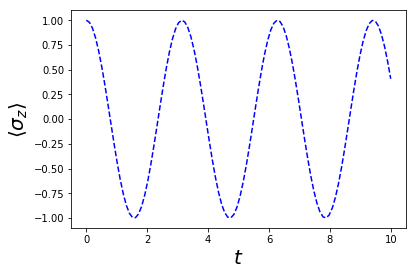

In [60]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, expect(sigmaz(), result.states),'--b')

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=20);

Also, we can request that the solver calculates the expectation values for the operators $\sigma_x, \sigma_y, \sigma_z$:

In [61]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

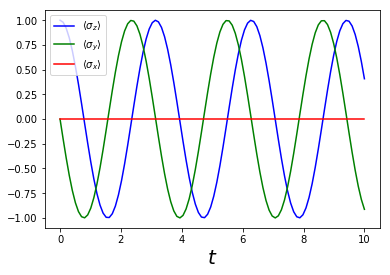

In [62]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, result.expect[2], '-b', label=r'$\left<\sigma_z\right>$')
axes.plot(tlist, result.expect[1], '-g', label=r'$\left<\sigma_y\right>$')
axes.plot(tlist, result.expect[0], '-r', label=r'$\left<\sigma_x\right>$')

axes.set_xlabel(r'$t$', fontsize=20)
axes.legend(loc=2);

# Dissipative dynamics

To add dissipation to a problem, all we need to do is to define a list of collapse operators to the call to the mesolve solver.

A collapse operator is an operator that describes how the system is interacting with its environment.

For example, consider a quantum harmonic oscillator with Hamiltonian

$H = \hbar\omega a^\dagger a$

and which loses photons to its environment with a relaxation rate $\kappa$. The collapse operator that describes this process is

$\sqrt{\kappa} a$

since $a$ is the photon annihilation operator of the oscillator.

To program this problem in QuTiP:

In [64]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
a = destroy(10)       # oscillator annihilation operator
rho0 = fock_dm(10, 5) # initial state, fock state with 5 photons
H = w * a.dag() * a   # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]

In [65]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a])

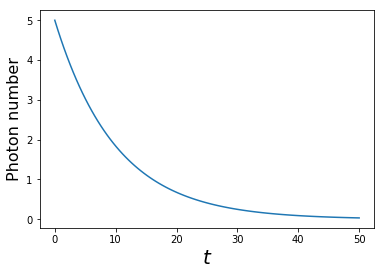

In [66]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);

# Two Level System

## Numerical Result

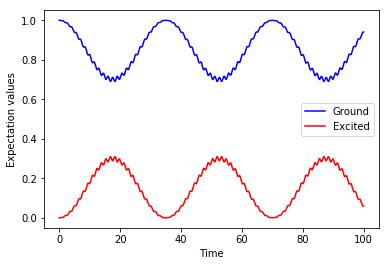

In [72]:
#System parameters
Omega0 = 0.1
w = 2.15
E1 = -1.0
E2 = 1.0

g = basis(2,0)
e = basis(2,1)
sgg = g * g.dag()   #ground state population
see = e * e.dag()   #excited state population
sge = g * e.dag()   #atomic coherence sigma_ge

#Hamiltonian H0, time-independent term
H0 = E1 * sgg + E2 * see

#Driving Hamiltonian, time-dependent term
H1 = (sge + sge.dag())

#Time dependence of the drive
def H1_coeff(t, args):
    return Omega0*np.cos(w*t)
#Complete Hamiltonian
H = [H0,[H1, H1_coeff]]

#Time
#tspan = np.linspace(0,100,10000)
tspan = np.arange(0.0, 100.0, 0.01)

#initial state
psi0 = g

#collapse operators
#c_ops = [np.sqrt(Gamma) * sge]

#calculated expectation values
e_ops = [sgg, see]
results = mesolve(H, psi0, tspan, [], e_ops)

fig, ax = subplots()
ax.plot(tspan, results.expect[0],'-b');
ax.plot(tspan, results.expect[1],'-r');
ax.set_xlabel('Time');
ax.set_ylabel('Expectation values');
ax.legend(("Ground", "Excited"));
show()

### Plot Results I (Numerics & RWA)

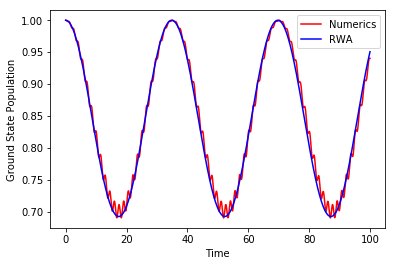

In [73]:
w0 = E2 - E1
delta = w - w0
Omega = np.sqrt(Omega0**2 + (delta**2)/4.0)

#def P0(t):
#    return np.cos(Omega*t)*np.cos(Omega*t) + (delta**2)*(np.sin(Omega*t)*np.sin(Omega*t))/(4.0*Omega*Omega)

def P1(t):
    return (Omega0**2)*(np.sin((np.sqrt((E1-E2+w)**2+Omega0**2)/2.0)*t))*(np.sin((np.sqrt((E1-E2+w)**2+Omega0**2)/2.0)*t))/((E1-E2+w)**2 + Omega0**2)

fig, ax2 = subplots()
ax2.plot(tspan, results.expect[0],'r');
ax2.plot(tspan, 1.0 - P1(tspan),'b');
ax2.set_xlabel('Time');
ax2.set_ylabel('Ground State Population');
ax2.legend(("Numerics", "RWA"));
show()


## J-C model Hamailtonian (Light-matter Interaction)

The most fundamental setups of Quantum optics(cavity quantum electrodynamics) can be described by the general quantum Rabi model: $$
    H_{Rabi} = \omega_{r}(a^{\dagger}a+\frac{1}{2})+\frac{\omega_q}{2}\sigma_z + g(a^{\dagger}+a)(\sigma_{+}+\sigma_{-})
$$ where $2g$ denotes an experimental parameter the vacuum Rabi frequency. 

$a^\dagger$and $a$ are bosonic creation and annihilation operator, respectively. 

$\sigma_+ = \left| e \right \rangle \left\langle g \right| $, $\sigma_- = \left|g\right \rangle \left \langle e \right|$

The interaction strength in cavity lay in the region:$(\omega_q + \omega_r) \gg {g,\left|\omega_q-\omega_r \right|}$ then after RWA we can obtain so-called Jaynes-Cummings model:

$$
    H_{JC} = \omega_{r}(a^{\dagger}a+\frac{1}{2})+\frac{\omega_q}{2}\sigma_z + g(a^{\dagger }\sigma_- + a\sigma_+)
$$


In [74]:
g_state = basis(2,0)
e_state = basis(2,1)
sz = sigmaz()
sm = destroy(2)
sp = sm.dag()
I_atom = qeye(2)
#define the operator of the atom(single Hilbert space)

Dimension_of_cavity = 15
a = destroy(Dimension_of_cavity)
adag = a.dag()
vac = basis(Dimension_of_cavity,0)
I_cav = qeye(Dimension_of_cavity)
#define the operator of the cavity

g_vac = tensor(vac,g_state)
sz = tensor(I_cav,sz)
sm = tensor(I_cav,sm)
sp = sm.dag()

a = tensor(a,I_atom)
adag = tensor(adag,I_atom)
#define the full operator by tensor product

### State Excitation as a function of coupling strength

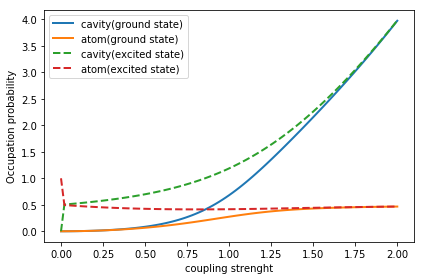

In [75]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
H0 = wc * adag * a + wa * sp * sm
H1 = (adag + a) * (sm + sp)

step=100
g_range = np.linspace(0,2.0,step+1)*2*np.pi
#generate the list of interaction g

g_list=[]
e_list = []

for g in g_range:
    H = H0 + g * H1
    enr,states = H.eigenstates()
    g_list.append(states[0])
    e_list.append(state-s[1])
#Using the method [eigtenstates] to obtain eigen states and energy
na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity
g_na_exp_list = expect(na,g_list)
g_nc_exp_list = expect(nc,g_list)
e_na_exp_list = expect(na,e_list)
e_nc_exp_list = expect(nc,e_list)
#get the excitation number of cavity and photon

fig,axes = plt.subplots()
axes.plot(g_range/(2*np.pi),g_nc_exp_list,linewidth = 2,label = "cavity(ground state)")
axes.plot(g_range/(2*np.pi),g_na_exp_list,linewidth = 2,label = "atom(ground state)")
axes.plot(g_range/(2*np.pi),e_nc_exp_list,'--',linewidth = 2,label = "cavity(excited state)")
axes.plot(g_range/(2*np.pi),e_na_exp_list,'--',linewidth = 2,label = "atom(excited state)")
axes.set_ylabel("Occupation probability")
axes.set_xlabel("coupling strenght")
axes.legend()
fig.tight_layout()

##### Ref: Johansson, R. (2014). Introduction to scientific computing in Python